In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.dpi'] = 1200

In [2]:
# read in the data
xpol = np.genfromtxt("linbo3_xpol_1550nm_.74mw")
ypol = np.genfromtxt("linbo3_ypol_1550nm_.74mw")
xangles = xpol[:, 0]
xshg = xpol[:, 1]
yangles = ypol[:, 0]
yshg = ypol[:, 1]

xangles_rad = np.deg2rad(xangles) # will need conversion for polar plotting
yangles_rad = np.deg2rad(yangles)

In [3]:
# plot the data 

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# cartesian
axs[0, 0].scatter(xangles, xshg, s = 2)
axs[0, 0].set_title("Analyzer $x$-polarization")
axs[0, 0].set_xlabel(r"Polarization angle $\varphi$ from HWP ($^\circ}$)")
axs[0, 0].set_ylabel("SHG Signal (μV)")

axs[0, 1].scatter(yangles, yshg, s = 2)
axs[0, 1].set_title("Analyzer $y$-polarization")
axs[0, 1].set_xlabel(r"Polarization angle $\varphi$ from HWP ($^\circ}$)")
axs[0, 1].set_ylabel("SHG Signal (μV)")

# get rid of cartesian frame, set polar
axs[1, 0].remove()
axs[1, 1].remove()
ax_polar1 = fig.add_subplot(2, 2, 3, projection='polar')
ax_polar2 = fig.add_subplot(2, 2, 4, projection='polar')

# polar
ax_polar1.scatter(xangles_rad, xshg, s = 2)
ax_polar2.scatter(yangles_rad, yshg, s = 2)

fig.suptitle("Reference SHG Polarimetry for LiNbO$_{3}$", fontsize = 15)
fig.tight_layout()
plt.show()

Recall that the complete second harmonic generation process is given as

$$
\begin{bmatrix}
P_1 \\
P_2 \\
P_3
\end{bmatrix}
=
\begin{bmatrix}
d_{11} & d_{12} & d_{13} & d_{14} & d_{15} & d_{16} \\
d_{21} & d_{22} & d_{23} & d_{24} & d_{25} & d_{26} \\
d_{31} & d_{32} & d_{33} & d_{34} & d_{35} & d_{36}
\end{bmatrix}
\begin{bmatrix}
E_1^2 \\
E_2^2 \\
E_3^2 \\
2E_2E_3 \\
2E_1E_3 \\
2E_1E_2
\end{bmatrix}
$$
where the $E_i$ are at frequency $\omega$ and the $P_i$ at frequency $2\omega$, and the $d_{ij}$ tensor is the SHG tensor.

Our electric field is incident as shown:

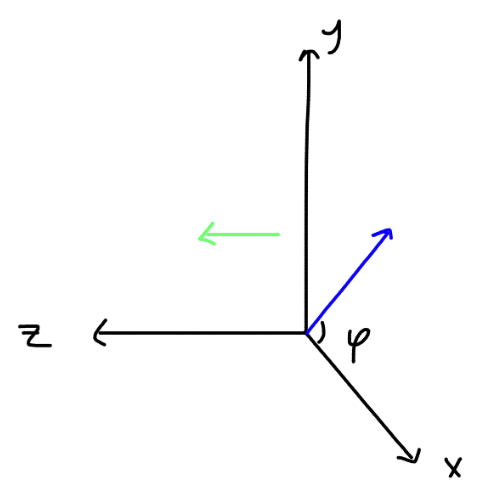

so that $E_1 = E\cos(\phi)$, $E_2 = E\sin(\phi)$, $E_3 = 0$, giving the quadratic column vector above as 

$$E^2\begin{bmatrix}
\cos^2 (\varphi) \\
\sin^2 (\varphi)\\
0 \\
0 \\
0 \\
2\cos(\varphi)\sin(\varphi)
\end{bmatrix}$$

We aligned our sample so that $3||Z_3 (z)$ and $m\perp Z_1(x)$ (cf. pg. 25, Newnham) in accordance with the $3m$ point group of LiNbO$_3$, and so our crystal physics axes were aligned with our lab axes, meaning no transformations are needed. Now, the $d_{ij}$ associated with $3m$ is

$$\begin{bmatrix}
0 & 0 & 0 & 0 & d_{31} & -d_{22} \\
-d_{22} & d_{22} & 0 & d_{31} & 0 & 0 \\
d_{31} & d_{31} & d_{33} & 0 & 0 & 0
\end{bmatrix}$$

and thus we obtain

$$
\begin{bmatrix}
P_1 \\
P_2 \\
P_3
\end{bmatrix}
=E^2
\begin{bmatrix}
0 & 0 & 0 & 0 & d_{31} & -d_{22} \\
-d_{22} & d_{22} & 0 & d_{31} & 0 & 0 \\
d_{31} & d_{31} & d_{33} & 0 & 0 & 0
\end{bmatrix}\begin{bmatrix}
\cos^2 (\varphi) \\
\sin^2 (\varphi)\\
0 \\
0 \\
0 \\
2\cos(\varphi)\sin(\varphi)
\end{bmatrix}
$$

We calculate:

In [4]:
import sympy as sp

phi, d22, d31, d33 = sp.symbols('varphi d_{22} d_{31} d_{33}')  

d_ij = sp.Matrix([
    [0,     0,     0,     0,     d31,  -d22],
    [-d22,  d22,   0,     d31,   0,     0   ],
    [d31,   d31,   d33,   0,     0,     0   ]
])

E_vec = sp.Matrix([
    sp.cos(phi)**2,
    sp.sin(phi)**2,
    0,
    0,
    0,
    2 * sp.cos(phi) * sp.sin(phi)
])

P = sp.simplify(d_ij * E_vec)

In [5]:
print(sp.latex(P))

\left[\begin{matrix}- d_{22} \sin{\left(2 \varphi \right)}\\- d_{22} \cos{\left(2 \varphi \right)}\\d_{31}\end{matrix}\right]


So 

$$\begin{bmatrix}
P_1 \\
P_2 \\
P_3
\end{bmatrix} = \left[\begin{matrix}- d_{22} \sin{\left(2 \varphi \right)}\\- d_{22} \cos{\left(2 \varphi \right)}\\d_{31}\end{matrix}\right]$$

For the theoretical SHG plots we obtain 
$$I_x^{2\omega}(\varphi) \propto  \left(\mathbf{P}^{2\omega}(\varphi) \cdot \mathbf{A}_x\right)^2$$
$$I_y^{2\omega}(\varphi) \propto  \left(\mathbf{P}^{2\omega}(\varphi) \cdot \mathbf{A}_y\right)^2$$

where the $\mathbf{A}_i$ are the output analyzer positions, in this geometry simply $\mathbf{A}_x = \hat{\mathbf{x}}$ and $\mathbf{A}_y = \hat{\mathbf{y}}$. Thus

$$I_x^{2\omega}(\varphi) \propto  \left(\left[\begin{matrix}- d_{22} \sin{\left(2 \varphi \right)}\\- d_{22} \cos{\left(2 \varphi \right)}\\d_{31}\end{matrix}\right] \cdot \begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix}\right)^2 = d_{22}^2 \sin^2{\left(2 \varphi \right)}$$

$$I_y^{2\omega}(\varphi) \propto  \left(\left[\begin{matrix}- d_{22} \sin{\left(2 \varphi \right)}\\- d_{22} \cos{\left(2 \varphi \right)}\\d_{31}\end{matrix}\right] \cdot \begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}\right)^2 =  d_{22}^2 \cos^2{\left(2 \varphi \right)}$$

We want to fit these functions to our data; we will call the proportionaity factor $\alpha$, but notice that this $\alpha$, which is related to our incident electric field (laser power, absorption by optics, etc.) is "degenerate" with $d_{22}$. If we had a reference measurement, we could tease out $\alpha$, but for now we combine both it and $d_{22}$ into an overall multiplicative free parameter for the fit $\alpha'$. That is, we will be fitting to our analyzer $x$-polarization data the function $\alpha' \sin^2(2\varphi)$ and to our $y$-polarization data the function $\alpha' \cos^2(2\varphi)$.

In [6]:
def x_resid(alpha, x, y):
    """ the residual function -- this is what will be minimized by the
        scipy.optimize.leastsq() routine. 

        scipy.optimize.leastsq() minimizes:

           x = arg min(sum(func(y)**2,axis=0))
                    y

        so this should just be the distance from a point to the curve,
        and it will square it and sum over the points
        """

    # note: if we wanted to deal with error bars, we would weight each
    # residual accordingly
    return (y - (alpha * np.sin(2*x)**2))  


def y_resid(alpha, x, y):
    return (y - (alpha * np.cos(2*x)**2))  

In [7]:
from scipy import optimize
alpha = 100 # initial guess
xfit, flag = optimize.leastsq(x_resid, alpha, args=(xangles_rad, xshg))
yfit, flag = optimize.leastsq(y_resid, alpha, args=(yangles_rad, yshg))



x_fit_grid = np.linspace(np.min(xangles_rad), np.max(xangles_rad), 1000)
x_fit_vals = xfit[0] * np.sin(2*x_fit_grid) ** 2
x_fit_grid_deg = np.rad2deg(x_fit_grid)

y_fit_grid = np.linspace(np.min(yangles_rad), np.max(yangles_rad), 1000)
y_fit_vals = yfit[0] * np.cos(2*y_fit_grid) ** 2
y_fit_grid_deg = np.rad2deg(y_fit_grid)

In [8]:
# plot the data 

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# cartesian
axs[0, 0].scatter(xangles, xshg, label = "Data", s = 2)
axs[0, 0].plot(x_fit_grid_deg, x_fit_vals, label = "Fit", linewidth = 0.75, color = "green")
axs[0, 0].set_title("Analyzer $x$-polarization")
axs[0, 0].set_xlabel(r"Polarization angle $\varphi$ from HWP ($^\circ}$)")
axs[0, 0].set_ylabel("SHG Signal (μV)")
axs[0, 0].legend()

axs[0, 1].scatter(yangles, yshg, label = "Data", s = 2)
axs[0, 1].plot(y_fit_grid_deg, y_fit_vals, label = "Fit", linewidth = 0.75, color = "green")
axs[0, 1].set_title("Analyzer $y$-polarization")
axs[0, 1].set_xlabel(r"Polarization angle $\varphi$ from HWP ($^\circ}$)")
axs[0, 1].set_ylabel("SHG Signal (μV)")
axs[0, 1].legend()

# get rid of cartesian frame, set polar
axs[1, 0].remove()
axs[1, 1].remove()
ax_polar1 = fig.add_subplot(2, 2, 3, projection='polar')
ax_polar2 = fig.add_subplot(2, 2, 4, projection='polar')

# polar
ax_polar1.scatter(xangles_rad, xshg, label = "Data", s = 2)
ax_polar1.plot(x_fit_grid, x_fit_vals, label = "Fit", linewidth = 0.75, color = "green")
ax_polar1.legend()

ax_polar2.scatter(yangles_rad, yshg, label = "Data", s = 2)
ax_polar2.plot(y_fit_grid, y_fit_vals, label = "Fit", linewidth = 0.75, color = "green")
ax_polar2.legend()

fig.suptitle("Reference SHG Polarimetry for LiNbO$_{3}$ with Fits", fontsize = 15)
fig.tight_layout()
plt.show()